In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis

from lifelines.plotting import plot_lifetimes


In [2]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [3]:
data_GAN = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival.csv'),
                  index_col=None)

In [4]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

In [5]:
data_GAN_x = data_GAN.iloc[:, 2:]
data_GAN_y = data_GAN.iloc[:, 0:2]

## Lifetime

### Actual

Text(0.5, 1.0, 'Failure at $cycle=1e6$')

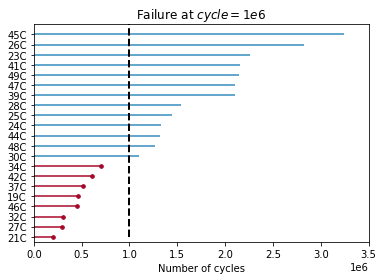

In [6]:
current_time = 1000000

observed_lifetimes = np.minimum(data['F_Time'], current_time)
death_observed = data['F_Time'] < current_time

ax = plot_lifetimes(data['F_Time'], event_observed=death_observed)

ax.set_xlim(0, 3500000)
ax.vlines(1000000, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("Number of cycles")
ax.set_title("Failure at $cycle=1e6$")

## Kaplan Meier

### Actual

Text(0.5, 1.0, 'original data')

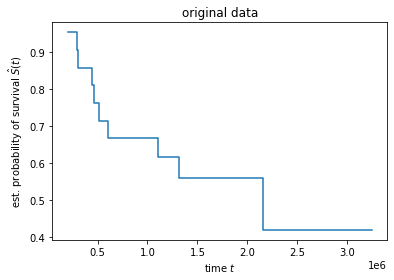

In [9]:
time, survival_prob = kaplan_meier_estimator(data_y["Observed"], data_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('original data')

### Synthetic

Text(0.5, 1.0, 'synthetic data')

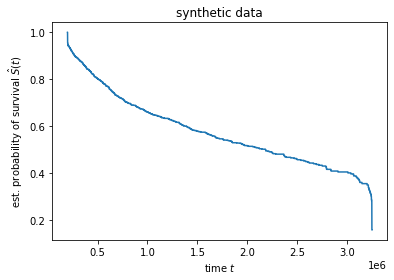

In [10]:
time, survival_prob = kaplan_meier_estimator(data_GAN_y["Observed"], data_GAN_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('synthetic data')

## Kaplan Meier by 'age' i.e. cycle at NDE

### Actual

Text(0.5, 1.0, 'original data')

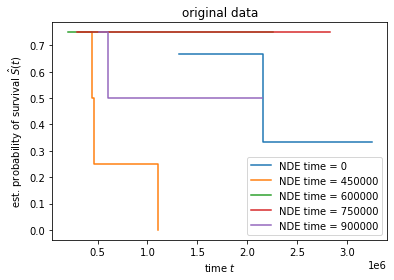

In [12]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["Observed"][mask_treat],
        data_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.title('original data')

### Synthetic

Text(0.5, 1.0, 'synthetic data')

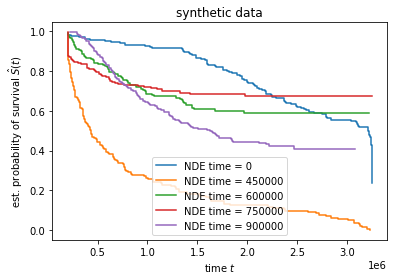

In [13]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_GAN_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_GAN_y["Observed"][mask_treat],
        data_GAN_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.title('synthetic data')